"Analysis of Electric Vehicle Population Data in Washington State"

This project aims to analyze the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) registered through the Washington State Department of Licensing (DOL). The objective is to gain insights into the distribution, market share, adoption trends, and characteristics of electric vehicles (EVs) in Washington State.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the data
df = pd.read_csv('./Electric_Vehicle_Population_Data.csv')
df.head()

VIN (1-10)     County     City State  Postal Code  Model Year    Make  \
0  5YJSA1E22K       King  Seattle    WA      98112.0        2019   TESLA   
1  3MW39FS05R     Yakima   Zillah    WA      98953.0        2024     BMW   
2  1N4AZ0CP0F       King     Kent    WA      98031.0        2015  NISSAN   
3  5YJSA1H20F  Snohomish  Bothell    WA      98012.0        2015   TESLA   
4  JTMAB3FV1N     Yakima   Yakima    WA      98908.0        2022  TOYOTA   

        Model                   Electric Vehicle Type  \
0     MODEL S          Battery Electric Vehicle (BEV)   
1        330E  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     MODEL S          Battery Electric Vehicle (BEV)   
4  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             270   
1             Not eligible due to low battery range              20   
2           Clean Alternative Fuel Vehicle Eligible              84   
3           Clean Alternative Fuel Vehicle Eligible             208   
4           Clean Alternative Fuel Vehicle Eligible              42   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                  43.0       202233958   
1          0                  15.0       264425178   
2          0                  11.0       114962025   
3          0                   1.0       232724670   
4          0                  14.0       221023589   

                  Vehicle Location  \
0    POINT (-122.300312 47.629782)   
1  POINT (-120.2658133 46.4063477)   
2    POINT (-122.201564 47.402358)   
3    POINT (-122.206146 47.839957)   
4    POINT (-120.611068 46.596645)   

                                Electric Utility  2020 Census Tract  
0   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303301e+10  
1                                     PACIFICORP       5.307700e+10  
2  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303303e+10  
3                         PUGET SOUND ENERGY INC       5.306105e+10  
4                                     PACIFICORP       5.307700e+10

Here is a snippet of the dataset containing detailed information about electric vehicle registrations in Washington State. Each row represents an individual vehicle and includes various attributes.

In [2]:
# Display basic information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         191407 non-null  object 
 1   County                                             191403 non-null  object 
 2   City                                               191403 non-null  object 
 3   State                                              191407 non-null  object 
 4   Postal Code                                        191403 non-null  float64
 5   Model Year                                         191407 non-null  int64  
 6   Make                                               191407 non-null  object 
 7   Model                                              191407 non-null  object 
 8   Electric Vehicle Type                              191407 non-null  object

This output is a summary of a DataFrame containing 191,407 entries and 17 columns related to electric vehicle registrations in the state.

The columns include 'VIN (1-10)', which holds the first 10 characters of the Vehicle
Identification Number, 'County' and 'City' indicating the registration locations,
and 'State' which consistently contains 'WA'. The 'Postal Code' provides postal
codes for the registration locations, while 'Model Year', 'Make', and 'Model'
provide details about the vehicle's year, manufacturer, and specific model. The
'Electric Vehicle Type' categorizes the vehicles as BEVs (Battery Electric Vehicles
or PHEVs (Plug-in Hybrid Electric Vehicles). The 'CAFV Eligibility' column indicates
whether the vehicle qualifies for clean alternative fuel vehicle status, and
'Electric Range' and 'Base MSRP' provide the electric-only range and the base
manufacturer's suggested retail price, respectively. The 'Legislative District'
specifies the district where the vehicle is registered. The 'DOL Vehicle ID' is a
unique identifier assigned by the Department of Licensing. 'Vehicle Location' offers
geographic coordinates of the vehicle's registration location. The 'Electric
Utility' column identifies the utility company providing electricity, and the '2020
Census Tract' column provides the census tract information.

The dataset is well-structured and provides detailed information, allowing comprehensive analysis of electric vehicle adoption trends, geographic distribution, and other relevant factors in Washington State.



The next cell creates a DataFrame df_missing to check for missing values in each column of the original DataFrame. It sorts the columns by the number of missing values in descending order.

In [3]:
# Check for missing values
df_missing = pd.DataFrame(df.isnull().sum())
# Sort the values
df_missing = df_missing.reset_index().rename(columns={'index': 'Column', 0: 'Missing Values'})
df_missing[df_missing['Missing Values']>0].sort_values(by='Missing Values', ascending=False)

Column  Missing Values
12  Legislative District             414
14      Vehicle Location               8
1                 County               4
4            Postal Code               4
2                   City               4
15      Electric Utility               4
16     2020 Census Tract               4

Here we can see that the 'Legislative District' column has the highest number of missing values at 414. The 'Vehicle Location' column has 8 missing values, while 'County', 'City', 'Postal Code', 'Electric Utility', and '2020 Census Tract' each have 4 missing values. The relatively small number of missing values in these columns suggests that the dataset is reliable for conducting an analysis of electric vehicle trends and distributions in the state.




The next part drops the Legislative District column due to excessive missing values and fills missing values in other columns with the most common value (mode). It then prints the count of missing values for each column.

In [4]:
# Drop the missing column
df.drop('Legislative District', axis=1, inplace=True)

# Add the most common data to the rest of the missing values
df['Vehicle Location'] = df['Vehicle Location'].fillna(df['Vehicle Location'].mode()[0])
df['County'] = df['County'].fillna(df['County'].mode()[0])
df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].mode()[0])
df['City'] = df['City'].fillna(df['City'].mode()[0])
df['Electric Utility'] = df['Electric Utility'].fillna(df['Electric Utility'].mode()[0])
df['2020 Census Tract'] = df['2020 Census Tract'].fillna(df['2020 Census Tract'].mode()[0])

# Check for missing values
print(df.isnull().sum())

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         191407 non-null  object 
 1   County                                             191407 non-null  object 
 2   City                                               191407 non-null  object 
 3   State                                              191407 non-null  object 
 4   Postal Code                                        191407 non-null  float64
 5   Model Year                                         191407 non-null  int64  
 6   Make                                               191407 non-null  object 
 7   Model                                              191407 non-null  object 
 8   Electric Vehicle Type                              191407 non-null  object

In [6]:
# By identifying and addressing duplicates, we can maintain the quality of the dataset and ensure more accurate analytical outcomes.
df_duplicates = pd.DataFrame(df.duplicated()).rename(columns={0: 'duplicate'})
df_duplicates[df_duplicates['duplicate'] == True]

Empty DataFrame
Columns: [duplicate]
Index: []



The next cell calculates the market share by vehicle make, displays the top 10 makes as a pie chart, and sets the title of the chart, then as a bar chart, also sets the title and labels for the chart.

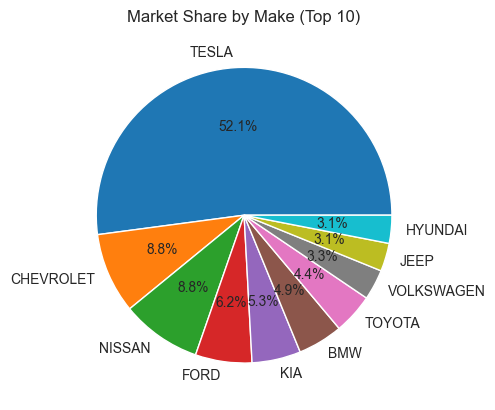

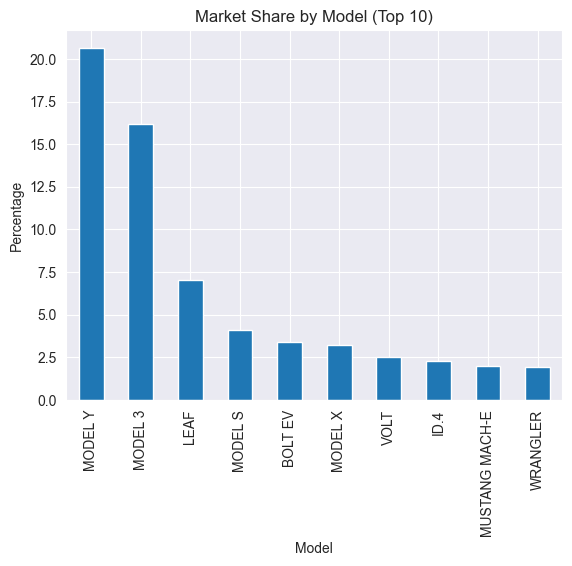

In [7]:
# Market share by make
make_share = df['Make'].value_counts(normalize=True) * 100
make_share.head(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('Market Share by Make (Top 10)')
plt.ylabel('')
plt.show()

# Market share by model
model_share = df['Model'].value_counts(normalize=True) * 100
model_share.head(10).plot(kind='bar')
plt.title('Market Share by Model (Top 10)')
plt.xlabel('Model')
plt.ylabel('Percentage')
plt.show()

Chart 1: Market Share by Make (Top 10)
The pie chart shows the market share of the top 10 electric vehicle (EV) manufacturers in Washington State.

1) TESLA (52.1%): Tesla dominates the market with more than half of the market share, indicating its strong presence and popularity among EV owners.

2) CHEVROLET and NISSAN (8.8% each): Both Chevrolet and Nissan hold a significant portion of the market, each capturing 8.8%.

3) FORD (6.2%): Ford also has a notable market share, making up 6.2% of the EV market.

4) Other Makes (BMW, KIA, HYUNDAI, JEEP, VOLKSWAGEN, TOYOTA): These manufacturers have smaller shares, ranging from 3.1% to 4.4%, showing diversity in the market but with less dominance compared to Tesla.



Chart 2: Market Share by Model (Top 10)
The bar chart illustrates the market share of the top 10 EV models.

1) MODEL Y (>20%): Tesla's Model Y is the most popular EV model, holding >20% of the market share.

2) MODEL 3 (around 16%): Another Tesla model, Model 3, follows closely with approximately 16% market share.

3) LEAF (around 7%): Nissan’s Leaf is the third most popular model, capturing about 7% of the market.

4) MODEL S (around 4%): Tesla's Model S has a significant presence with around 4% market share.

5) Other Models (BOLT EV, MODEL X, VOLT, ID.4, MUSTANG MACH-E, WRANGLER): These models have smaller shares, ranging from around 2% to 3%, indicating a variety of options chosen by EV owners but less dominance compared to the top models



The next cell creates a stacked bar chart to show the adoption of different
electric vehicle types over the years, grouping by model year and electric
vehicle type.

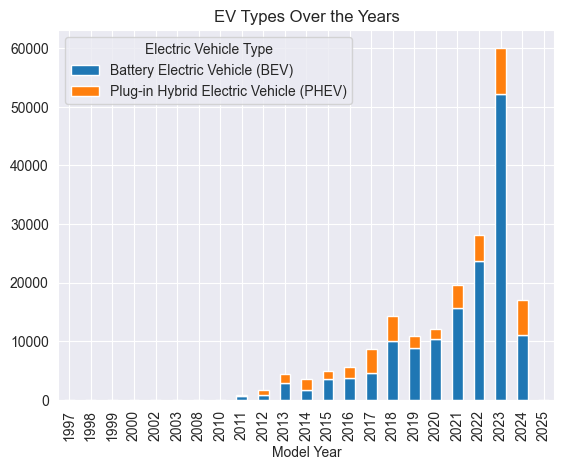

In [8]:
# Adoption of EV types over the years
ev_type_by_year = df.groupby(['Model Year', 'Electric Vehicle Type']).size().unstack().fillna(0)
ev_type_by_year.plot(kind='bar', stacked=True)
plt.title('EV Types Over the Years')
plt.show()

"EV Types Over the Years"

This bar chart shows the number of electric vehicles (EVs) by model year, categorized into Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs).

1. Trend Over Time:

- Early Years (1997-2010): Minimal presence of EVs, indicating the early stages of electric vehicle adoption.

- Gradual Increase (2011-2015): Noticeable increase in EV registrations, showing the beginning of broader market adoption.

- Significant Growth (2016-2023): Sharp rise in the number of EVs, particularly from 2016 onwards, reflecting a rapid increase in consumer acceptance and market growth.

- Peak in 2023 and 2024: The highest number of EVs registered, with 2023 showing a significant peak, followed by 2024.




2. BEVs vs. PHEVs:

 - BEVs Dominance: The majority of the registrations are BEVs, shown in light blue. This indicates a strong preference for fully electric vehicles over hybrids.

 - PHEVs Presence: Although smaller in number compared to BEVs, PHEVs (shown in brown) also show a notable increase, especially in recent years, indicating their role in the transition to electric mobility.



The next cell fills missing values in the City and Postal Code columns with 'Unknown' and creates a bar chart showing the top 10 cities by the number of vehicles.

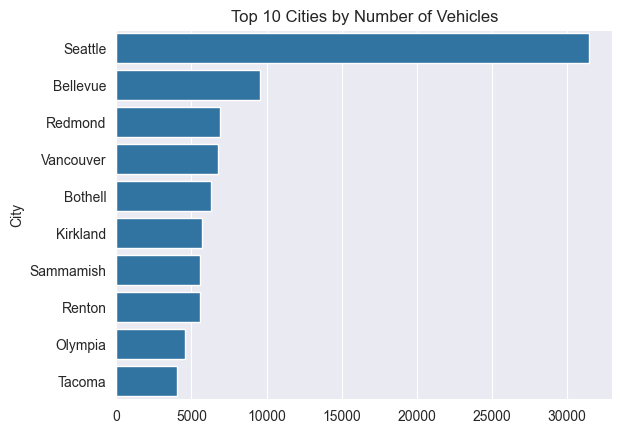

In [9]:
# Number of vehicles by city
df['City'].fillna('Unknown')
df['Postal Code'].fillna('Unknown')

city_counts = df['City'].value_counts().head(10)
sns.barplot(x=city_counts.values, y=city_counts.index)
plt.title('Top 10 Cities by Number of Vehicles')
plt.show()

Seattle: Leading in Registrations. Seattle ranks first with over 35,000 registered electric vehicles. This indicates a high level of EV adoption in the city, likely due to its developed infrastructure and higher awareness of sustainable transportation.

Bellevue: Second Highest. Bellevue follows with a significant number of registrations, showing a strong presence of electric vehicles, though notably less than Seattle.

Redmond, Vancouver, Bothell: These cities have a moderate number of registered EVs, reflecting a balanced adoption rate. Redmond and Bothell are known for their proximity to tech hubs, which might contribute to higher EV adoption.

Kirkland, Sammamish, Renton: These cities have a smaller yet significant number of electric vehicle registrations, indicating growing interest and infrastructure development in these areas.

Olympia, Tacoma: Olympia and Tacoma round out the top 10, with a noticeable number of EVs, suggesting ongoing growth and interest in sustainable transportation.



The next cell calculates the age of each car based on the model year, filters the data to include only cities with more than 1000 vehicles, calculates the average age of cars in these cities, and creates a horizontal bar chart to display the results.

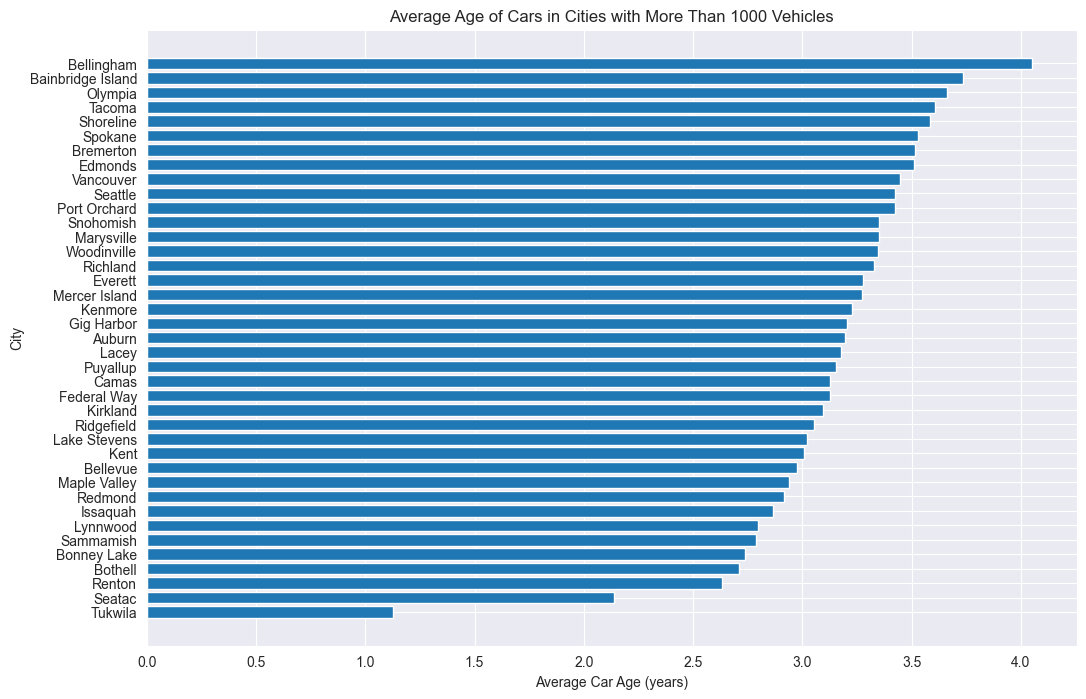

In [10]:
import datetime

df_copy = df.copy()

# Remove entries with missing 'Model Year' or 'City'
df_copy = df_copy.dropna(subset=['Model Year', 'City'])

# Calculate the age of each car
df_copy['Model Year'] = df_copy['Model Year'].astype(int)
current_year = datetime.datetime.now().year
df_copy['Car Age'] = current_year - df_copy['Model Year']

# Filter to include only large cities
city_vehicle_counts = df_copy['City'].value_counts()
large_cities = city_vehicle_counts[city_vehicle_counts > 1000].index
df_large_cities = df_copy[df_copy['City'].isin(large_cities)]

# Calculate the average age of cars
city_avg_age = df_large_cities.groupby('City')['Car Age'].mean().reset_index()
city_avg_age = city_avg_age.sort_values(by='Car Age')

# Plot
plt.figure(figsize=(12, 8))
plt.barh(city_avg_age['City'], city_avg_age['Car Age'])
plt.xlabel('Average Car Age (years)')
plt.ylabel('City')
plt.title('Average Age of Cars in Cities with More Than 1000 Vehicles')
plt.grid(True)
plt.show()

"Average Age of Cars in Cities with More Than 1000 Vehicles"

This bar chart displays the average age of cars in cities with more than 1000 registered electric vehicles in Washington State.


Bellingham - Oldest Average Age: Bellingham has the oldest average car age, approaching 4 years. This could indicate either early adoption of EVs or slower turnover of vehicles.

Tukwila- Youngest Vehicles: Tukwila have the youngest average vehicle age, around 1.5 years. This indicates recent and rapid adoption of electric vehicles in these areas.

Other Cities: Cities like Bainbridge Island, Olympia, Tacoma, Seattle, Bellevue, Redmond, etc. fall in between, showing a range of average vehicle ages from around 1.5 to 3.5 years.



The next cell calculates and displays the proportion of Clean Alternative Fuel Vehicle (CAFV) eligible vehicles in the dataset using a bar chart.

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    0.533591
Clean Alternative Fuel Vehicle Eligible                         0.359365
Not eligible due to low battery range                           0.107044
Name: proportion, dtype: float64


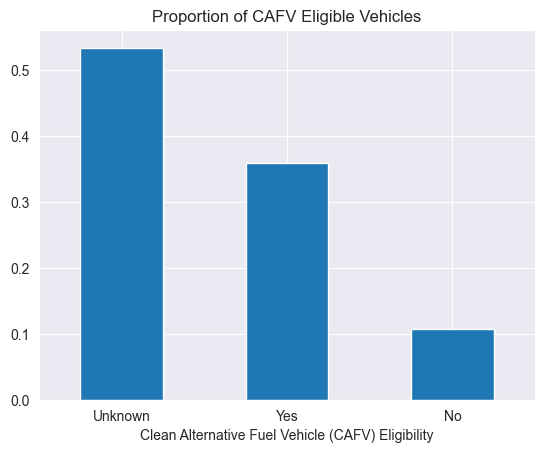

In [11]:
# Proportion of CAFV eligible vehicles
print(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(normalize=True))
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(ticks=[0, 1, 2], labels=['Unknown','Yes', 'No'], rotation=0)
plt.title('Proportion of CAFV Eligible Vehicles')
plt.show()

"Proportion of CAFV Eligible Vehicles"
This bar chart displays the proportions of electric vehicles based on their eligibility for Clean Alternative Fuel Vehicle (CAFV) status in Washington State.


Unknown Eligibility (53.4%):The largest proportion of vehicles falls into the "Unknown" category, where the battery range has not been researched. This indicates that more than half of the electric vehicles lack sufficient data to determine their CAFV eligibility.

CAFV Eligible (35.9%): A significant portion of vehicles is eligible for CAFV status. These vehicles meet the criteria for clean alternative fuel vehicles, likely benefiting from associated incentives and environmental benefits.

Not Eligible (10.7%):A smaller portion of the vehicles is not eligible for CAFV status due to having a low battery range. These vehicles do not meet the criteria required for clean alternative fuel vehicle designation.



The next cell creates a horizontal bar chart to show the number of vehicles by electric vehicle type.

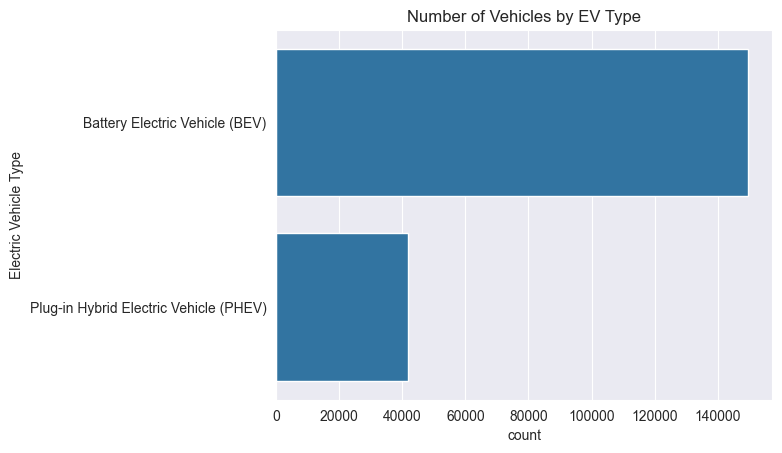

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y='Electric Vehicle Type', data=df, order=df['Electric Vehicle Type'].value_counts().index)
plt.title('Number of Vehicles by EV Type')
plt.show()

"Number of Vehicles by EV-Type"

This horizontal bar chart displays the number of electric vehicles by type, distinguishing between Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) in Washington State.


Battery Electric Vehicles (BEVs):

Dominant Category: BEVs make up the majority of the electric vehicles, with a count significantly higher than PHEVs. This indicates a strong preference for fully electric vehicles over hybrids. The chart shows that there are over 145,000 BEVs, highlighting their popularity and market dominance.
Plug-in Hybrid Electric Vehicles (PHEVs):

Smaller Share: PHEVs account for a smaller proportion of the market compared to BEVs. This suggests that while hybrids are still relevant, they are less preferred compared to fully electric options. There are more than 40,000 PHEVs, showing a notable but lesser presence in the market.



The next cell calculates and displays a correlation matrix for numerical features (Electric Range, Base MSRP, Model Year) using a heatmap.

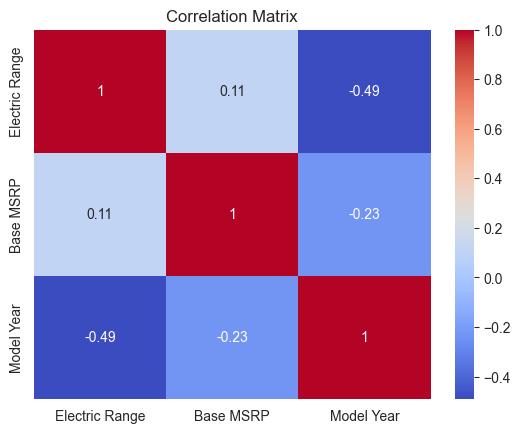

In [13]:
# Correlation matrix for numerical features
corr_matrix = df[['Electric Range', 'Base MSRP', 'Model Year']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

"Correlation Matrix"

This correlation matrix displays the relationships between three variables related to electric vehicles: Electric Range, Base MSRP (Manufacturer's Suggested Retail Price), and Model Year.

The values range from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.


Correlation of Electric Range with Base MSRP (0.11): There is a very weak positive correlation between electric range and base MSRP. This suggests that, generally, vehicles with a higher electric range tend to have a slightly higher base MSRP, but the relationship is not strong.

Correlation of Electric Range with Model Year (-0.49): There is a moderate negative correlation between electric range and model year. This indicates that older models tend to have a lower electric range, while newer models generally have a higher range. This reflects technological advancements in battery technology over time.

Correlation of Base MSRP with Model Year (-0.23): There is a weak negative correlation between base MSRP and model year. This could suggest that newer models might be priced slightly lower than older ones, potentially due to economies of scale and advancements in manufacturing efficiency.





The next cell calculates the electric range per dollar for each make, sorts them by median values, and displays the results using a box plot.

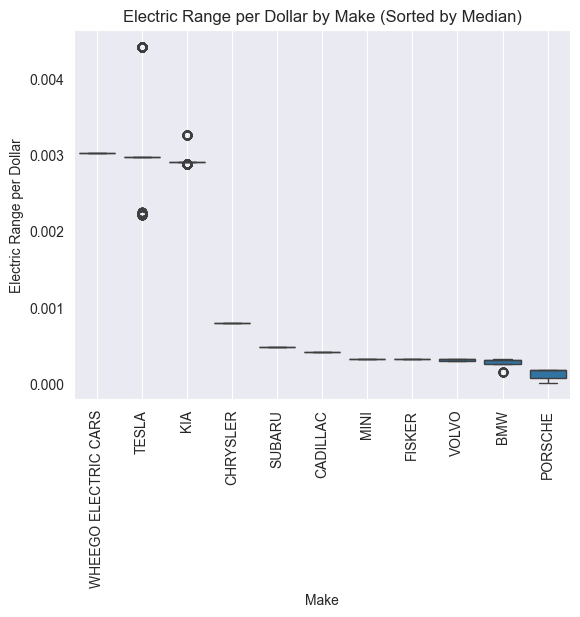

In [14]:
# Calculate median electric range per dollar for each make
df_cleared = df[(df['Electric Range'] > 0) & (df['Base MSRP'] > 0)].dropna(subset=['Electric Range', 'Base MSRP'])

df_cleared['Electric Range per Dollar'] = df_cleared['Electric Range'] / df_cleared['Base MSRP']
median_values = df_cleared.groupby('Make')['Electric Range per Dollar'].median().sort_values(ascending=False)

sns.boxplot(x='Make', y='Electric Range per Dollar', data=df_cleared, order=median_values.index)
plt.title('Electric Range per Dollar by Make (Sorted by Median)')
plt.xlabel('Make')
plt.ylabel('Electric Range per Dollar')
plt.xticks(rotation=90)
plt.grid()
plt.show()

"Electric Range per Dollar by Make (Sorted by Median)"

This box plot displays the electric range per dollar for each make of electric vehicle, sorted by their median values. It provides insights into which manufacturers offer the best value in terms of electric range relative to the vehicle's cost.

1. WHEEGO ELECTRIC CARS - Highest Value: Wheego Electric Cars offer the highest electric range per dollar, suggesting they provide the most cost-efficient range among the brands analyzed.

2. TESLA and KIA - High Value: Both Tesla and Kia also show high electric range per dollar, indicating that these brands offer good value for money in terms of range. Tesla's presence here underscores its efficiency despite generally higher prices.

3. CHRYSLER, SUBARU, CADILLAC - Moderate Value: These brands provide a moderate electric range per dollar. They are mid-tier in terms of cost efficiency for the electric range.

4. MINI, FISKER, VOLVO - Lower Value: These makes show a lower electric range per dollar, indicating less cost efficiency compared to the top performers.

5. BMW and PORSCHE - Lowest Value: BMW and Porsche are at the lower end of the spectrum, suggesting these luxury brands offer less electric range relative to their higher costs.



The next cell counts the number of vehicles served by each electric utility and creates a bar chart to display the top 10 electric utilities by the number of vehicles.

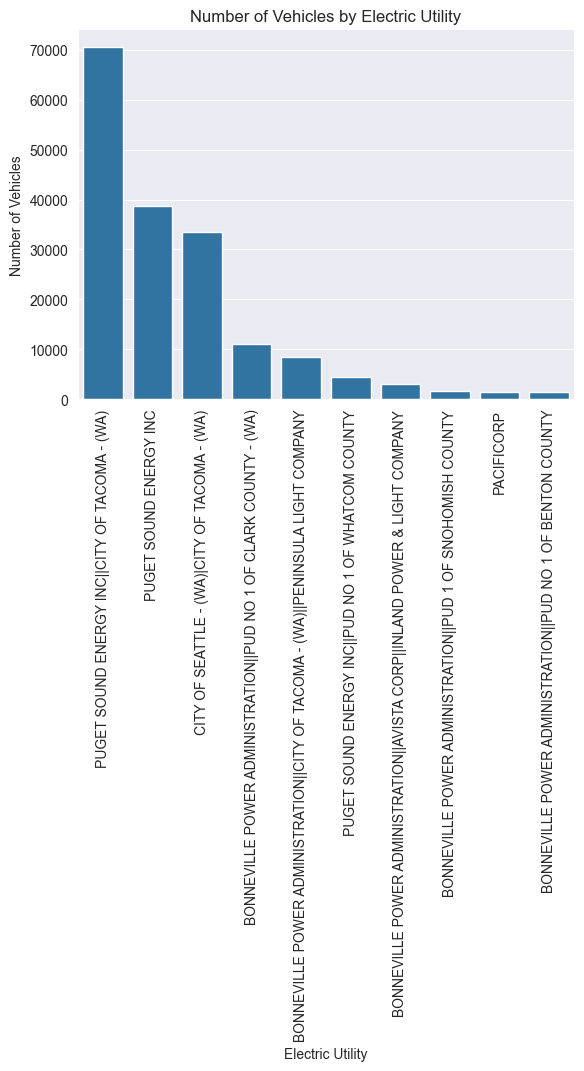

In [15]:
# Count the number of vehicles served by each electric utility
utility_counts = df['Electric Utility'].value_counts()

# Plot the number of vehicles by electric utility
sns.barplot(x=utility_counts.head(10).index, y=utility_counts.head(10).values)
plt.title('Number of Vehicles by Electric Utility')
plt.xlabel('Electric Utility')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=90)
plt.show()

"Number of Vehicles by Electric Utility"

This bar chart displays the number of electric vehicles served by the top 10 electric utilities in Washington State.

Puget Sound Energy (City of Tacoma, WA) - Leading Utility: Serving the highest number of electric vehicles, with nearly 70,000 vehicles. This indicates its significant role in supporting electric vehicle infrastructure and adoption.

Puget Sound Energy Inc - Second Highest: Serving a substantial number of vehicles, around 38,000. This utility also plays a crucial role in the electric vehicle ecosystem.

City of Seattle (WA) and City of Tacoma (WA) - Notable Contributions: Both cities' utilities support around 35,000 vehicles, respectively, showing strong municipal involvement in promoting electric vehicle use.

Other Utilities - Moderate Support: Utilities like Bonneville Power Administration, PUD No. 1 of Clark County (WA), etc. support a moderate number of vehicles, ranging from about 10,000 and less.

In [17]:
import numpy as np
import re
import pandas as pd
import folium
import random

# Extract coordinates from the 'Vehicle Location'
def extract_coordinates(point):
    match = re.search(r"POINT \((-?\d+\.\d+) (-?\d+\.\d+)\)", point)
    if match:
        lon, lat = match.groups()
        return float(lat), float(lon)
    return None, None

# Sample DataFrame setup (assuming df is your original DataFrame)
df_copy = df.copy()
df_copy[['Latitude', 'Longitude']] = df_copy['Vehicle Location'].apply(lambda x: pd.Series(extract_coordinates(x)))
df_copy = df_copy.dropna(subset=['Latitude', 'Longitude'])

# Create a dictionary to store the coordinates for each utility
utility_coords = {}

# Group coordinates by utility
for utility in df_copy['Electric Utility'].unique():
    utility_coords[utility] = df_copy[df_copy['Electric Utility'] == utility][['Latitude', 'Longitude']].values

# Calculate the centroid for each utility
utility_centroids = {utility: np.mean(coords, axis=0) for utility, coords in utility_coords.items()}

# Assign colors to each utility
colors = {utility: "#{:06x}".format(random.randint(0, 0xFFFFFF)) for utility in utility_coords.keys()}

# Create a Folium map centered around the mean coordinates of all points
map_clusters = folium.Map(location=[np.mean(df_copy['Latitude']), np.mean(df_copy['Longitude'])], zoom_start=10)

# Add points to the map for each vehicle
for idx, row in df_copy.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=colors[row['Electric Utility']],
        fill=True,
        fill_color=colors[row['Electric Utility']],
        fill_opacity=0.7,
        tooltip=row['Electric Utility']
    ).add_to(map_clusters)

# Add centroids to the map for each utility
for utility, centroid in utility_centroids.items():
    color = colors[utility]
    popup_html = f'<div style="font-size: 16px"><b>{utility}</b><br><span style="color: {color};">&#9608;</span> {color}</div>'
    folium.Marker(
        location=[centroid[0], centroid[1]],
        icon=folium.Icon(color='red', icon='info-sign'),
        popup=popup_html
    ).add_to(map_clusters)

# Save the map to an HTML file
map_clusters.save('utility_clusters.html')

This cell analyzes the registered locations of the vehicles and their assigned electric utilities. This information is then used to compute the approximate centroids of the unique electric utilities in the state. The vehicle locations and utility centroids are then displayed on a map with a unique color for every utility. Apart from analyzing the covering areas of the electric utilities, the estimated utility centroids can be used to predict electric utility assignments for new vehicles with missing information.